In [1]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
# Read data (first leg of journey)
telemetry = pd.read_csv('./telemetry_cleaned.csv')
X = telemetry[['Easting', 'Northing', 'WaterDepth']]

### Windowed Clustering

This technique involves breaking the points into chunks, the size of each chunk being defined by a `window` variable. DBSCAN clustering is then applied to each chunk and a list of labeled chunks is produced.

In [3]:
window_size = 10000

def windowed_clustering(data, verbose=False):
	chunks = []
	results = []
	index = 0

	while index <= data.shape[0]:
		# Get window (chunk)
		chunk = data.iloc[index:index+window_size]

		if verbose:
			print('Starting chunk', index/window_size)

		# Run clustering and append chunk
		db = DBSCAN(eps=0.15, min_samples=9).fit(chunk)
		chunk = chunk.assign(Label=db.labels_)
		chunks.append(chunk)

		silhouette = metrics.silhouette_score(chunk, db.labels_)
		davies_bouldin = metrics.davies_bouldin_score(chunk, db.labels_)

		results.append({
			'silhouette': silhouette,
			'davies_bouldin': davies_bouldin
		})

		if verbose:
			print('Completed chunk', index/window_size)

		index += window_size

	return (chunks, pd.DataFrame(results))

chunks, results = windowed_clustering(X, True)
print(f'Using a window of {window_size} points, {len(chunks)} chunks were created')

Starting chunk 0.0
Completed chunk 0.0
Starting chunk 1.0
Completed chunk 1.0
Starting chunk 2.0
Completed chunk 2.0
Starting chunk 3.0
Completed chunk 3.0
Starting chunk 4.0
Completed chunk 4.0
Starting chunk 5.0
Completed chunk 5.0
Starting chunk 6.0
Completed chunk 6.0
Starting chunk 7.0
Completed chunk 7.0
Starting chunk 8.0
Completed chunk 8.0
Starting chunk 9.0
Completed chunk 9.0
Starting chunk 10.0
Completed chunk 10.0
Starting chunk 11.0
Completed chunk 11.0
Starting chunk 12.0
Completed chunk 12.0
Starting chunk 13.0
Completed chunk 13.0
Starting chunk 14.0
Completed chunk 14.0
Starting chunk 15.0
Completed chunk 15.0
Starting chunk 16.0
Completed chunk 16.0
Starting chunk 17.0
Completed chunk 17.0
Starting chunk 18.0
Completed chunk 18.0
Starting chunk 19.0
Completed chunk 19.0
Starting chunk 20.0
Completed chunk 20.0
Starting chunk 21.0
Completed chunk 21.0
Starting chunk 22.0
Completed chunk 22.0
Starting chunk 23.0
Completed chunk 23.0
Starting chunk 24.0
Completed chunk 

Denoise chunks:

In [4]:
X_denoised = pd.concat(chunks)
X_denoised = X_denoised[X_denoised['Label'] != -1]

In [11]:
X_denoised['Label'].unique()

array([ 0,  1,  7,  2,  3,  8,  9,  6,  4,  5, 10, 11, 12, 13, 14, 15, 16,
       24, 17, 18, 19, 20, 21, 22, 23], dtype=int64)

In [6]:
pd.DataFrame(results)

,silhouette,davies_bouldin
0,0.740366,1.016321
1,0.180938,1.914002
2,0.012264,0.902779
3,0.389480,1.415835
4,0.805022,1.343084
5,-0.283559,0.909483
6,-0.146798,1.134236
7,0.404491,0.307508
8,0.634792,0.580648
9,0.737039,0.649317


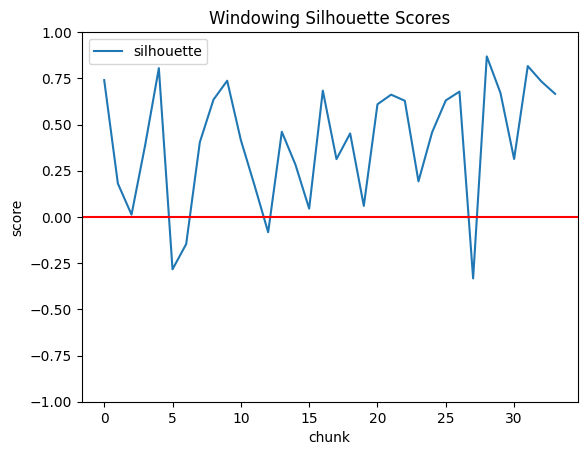

In [7]:
ax1 = results.plot(y='silhouette', xlabel='chunk', ylabel='score', ylim=(-1,1), title='Windowing Silhouette Scores')
ax1.axhline(0, color='red')

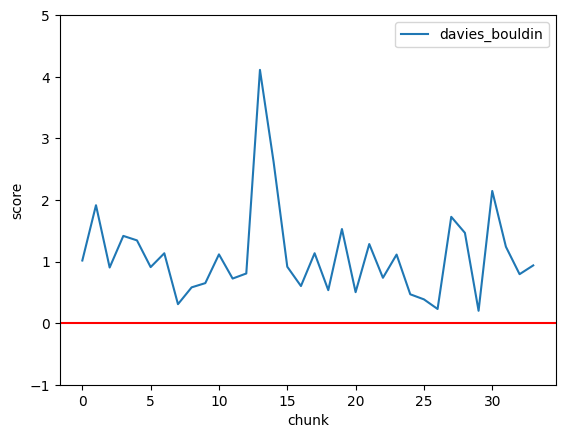

In [8]:
ax2 = results.plot(y='davies_bouldin', xlabel='chunk', ylabel='score', ylim=(-1,5))
ax2.axhline(0, color='red')